In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



X_test = pd.read_csv('X_test.csv')
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [4]:
# remove the useless indices from X and y
X = X.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)
y = y.drop(['Unnamed: 0'], axis=1)

In [5]:
y.head()

,Salary
0,175966.0
1,160000.0
2,35000.0
3,195000.0
4,120000.0


In [6]:
# add the Salary from y column to X as a different dataframe
full_df = pd.concat([X, y], axis=1)
full_df

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0
...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0
5359,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0
5360,25.0,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0
5361,32.0,F,bachelor's|degr,software|enginee,6.0,chin,White,1.797528,56.571118,150.0,90000.0


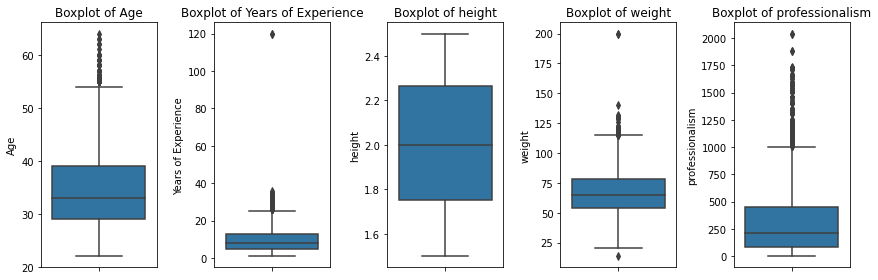

In [7]:
# Select only numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(12, 4))

# Iterate over each numeric column and create a boxplot in the corresponding subplot
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.boxplot(data=X, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()


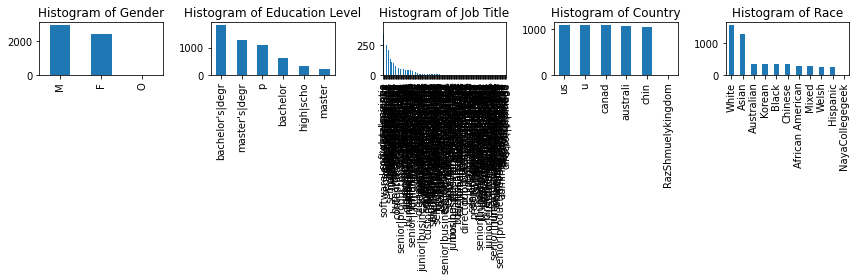

In [8]:
# Select only categorical columns
categorical_columns = X.select_dtypes(include='object').columns

# Create a grid of subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(12, 4))

# Iterate over each categorical column and create a bar plot in the corresponding subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = X[column].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f"Histogram of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()


* So as you can see there are some funny columns and inexistent *counties* and *races*.
* The Jobs are to be cleaned/nromalized , there are too much of them.

clean clean clean


In [10]:
X['Job Title'].str.split('|'). #.value_counts().tail(40)

vp|of|financ                         1
strategy|consultan                   1
digital|content|produce              1
senior|human|resources|specialis     1
network|enginee                      1
junior|social|media|manage           1
senior|training|specialis            1
director|of|human|capita             1
principal|scientis                   1
human|resources|directo              1
senior|hr|specialis                  1
ux|researche                         1
accountan                            1
director|of|human|resource           1
chief|technology|office              1
software|project|manage              1
it|support|specialis                 1
junior|customer|support|specialis    1
training|specialis                   1
software|manage                      1
junior|ux|designe                    1
technical|write                      1
senior|human|resources|coordinato    1
junior|data|scientis                 1
junior|social|media|specialis        1
senior|it|project|manage 

In [6]:
from transformers import pipeline

fix_spelling = pipeline("text2text-generation",model="oliverguhr/spelling-correction-english-base")

print(fix_spelling("My job title is 'customers success resear'",max_length=2048))

[{'generated_text': "My job title is 'customer's success research'."}]
